In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('/home/hgidea/Desktop/Coding/Python/internship/mentorness/ml_2/FastagFraudDetection.csv')

# 1. Data Exploration

**Basic Data Inspection**

In [5]:
df.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4451
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

In [6]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [8]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [9]:
df.dtypes

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

In [10]:
# Check for missing values
print(df.isnull().sum())

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


In [11]:
df_dropna = df.dropna(subset=['FastagID'])  # Drop rows with missing values in 'FastagID'


In [12]:

print(df_dropna.shape)  # Check the new DataFrame shape to see how many rows were dropped

(4451, 13)


In [13]:
# Fraud Prevalence
# Convert 'Fraud_indicator' to numeric (assuming 'Fraud' is 1 and 'Not Fraud' is 0)
df['Fraud_indicator'] = df['Fraud_indicator'].replace({'Fraud': 1, 'Not Fraud': 0})

fraud_percentage = df['Fraud_indicator'].mean() * 100
print(f"Fraudulent transactions: {fraud_percentage:.2f}%")

Fraudulent transactions: 19.66%


/tmp/ipykernel_10184/3962333453.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fraud_indicator'] = df['Fraud_indicator'].replace({'Fraud': 1, 'Not Fraud': 0})


In [14]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

**Data Visualization**

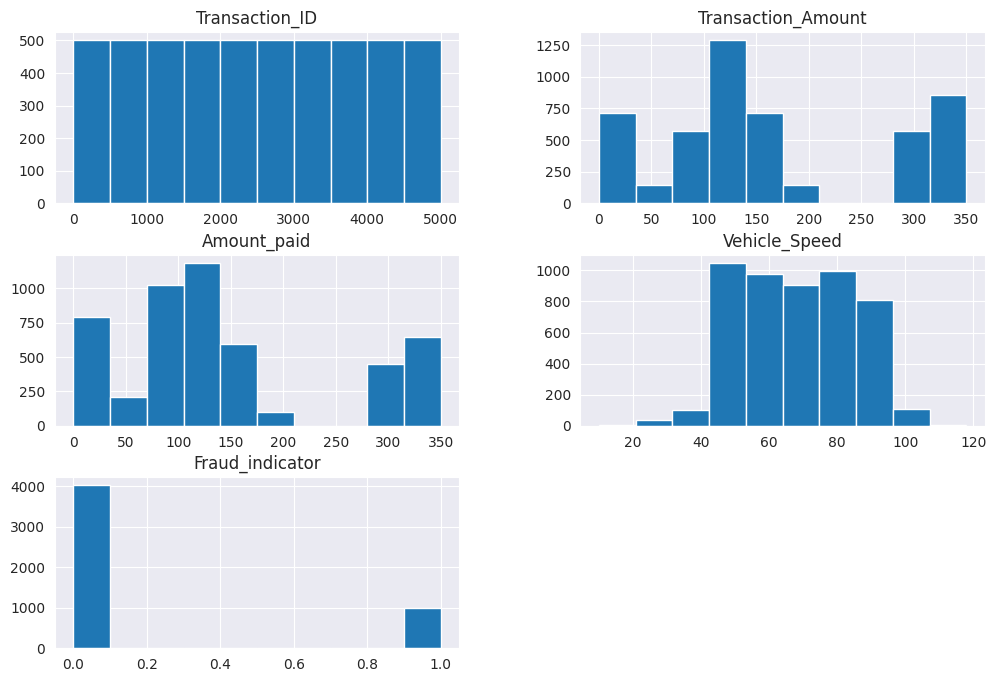

In [15]:
# Analyze feature distributions (histograms)
df.hist(figsize=(12, 8))
plt.show()

In [16]:
# Investigate correlations with the target variable (fraud indicator)
# Convert date/time columns to numeric representation before calculating correlations
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Replace 'Date_Column' with the actual column name
df['Date_Column_Numeric'] = df['Timestamp'].astype(int)  # Convert to numeric timestamp

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method="spearman")  # Now calculate correlations

print(correlation_matrix)

                     Transaction_ID  Transaction_Amount  Amount_paid  \
Transaction_ID             1.000000           -0.051021     0.036644   
Transaction_Amount        -0.051021            1.000000     0.851758   
Amount_paid                0.036644            0.851758     1.000000   
Vehicle_Speed              0.011694            0.081964     0.063606   
Fraud_indicator           -0.164909            0.167229    -0.257219   
Date_Column_Numeric        0.258713           -0.041020     0.006261   

                     Vehicle_Speed  Fraud_indicator  Date_Column_Numeric  
Transaction_ID            0.011694        -0.164909             0.258713  
Transaction_Amount        0.081964         0.167229            -0.041020  
Amount_paid               0.063606        -0.257219             0.006261  
Vehicle_Speed             1.000000         0.016242             0.021338  
Fraud_indicator           0.016242         1.000000            -0.084419  
Date_Column_Numeric       0.021338        -0.

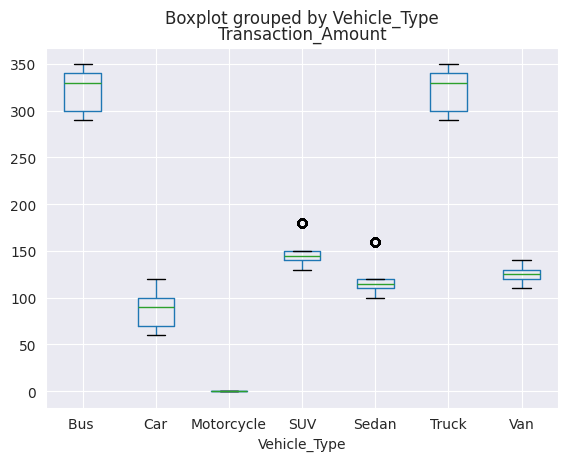

In [17]:
# Visualize categorical feature relationships (boxplots)
df.boxplot(by="Vehicle_Type", column="Transaction_Amount")
plt.show()

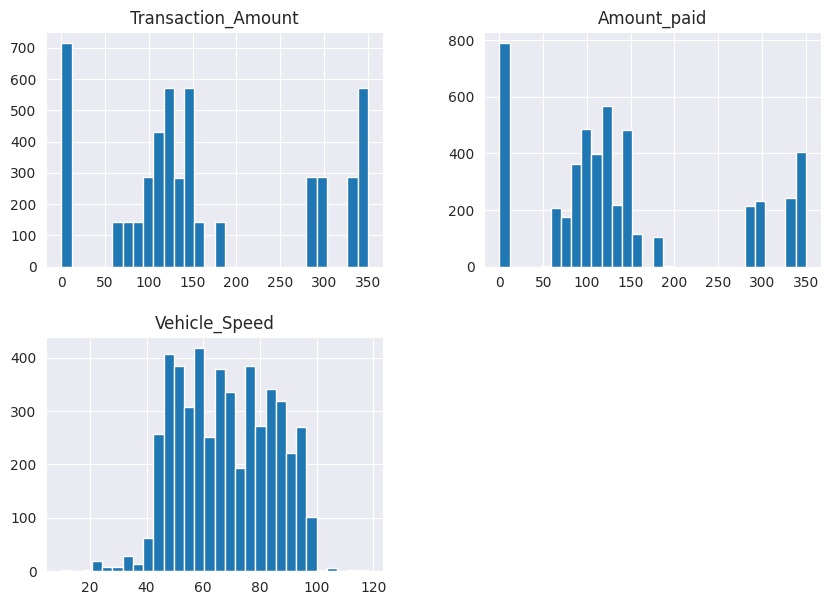

In [18]:
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
df[numerical_features].hist(bins=30, figsize=(10, 7))
plt.show()

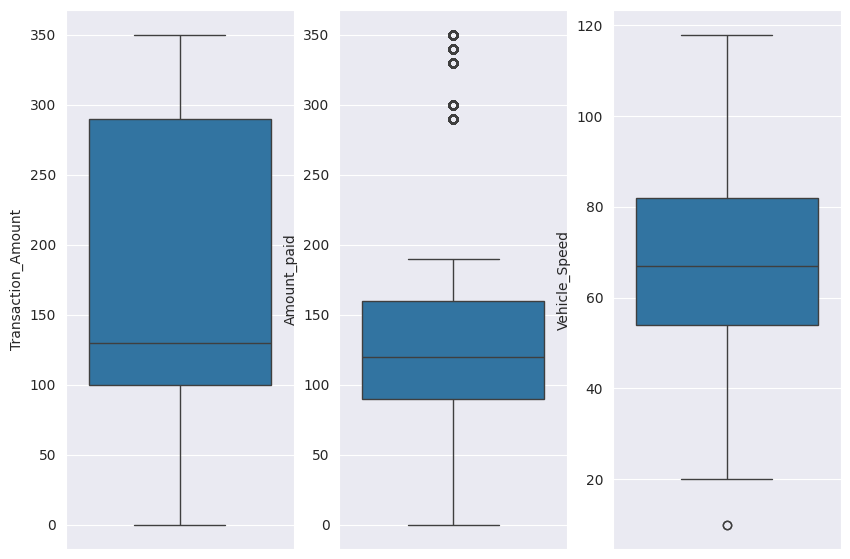

In [19]:
# Box plots for numerical features
plt.figure(figsize=(10, 7))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=feature, data=df)
plt.show()

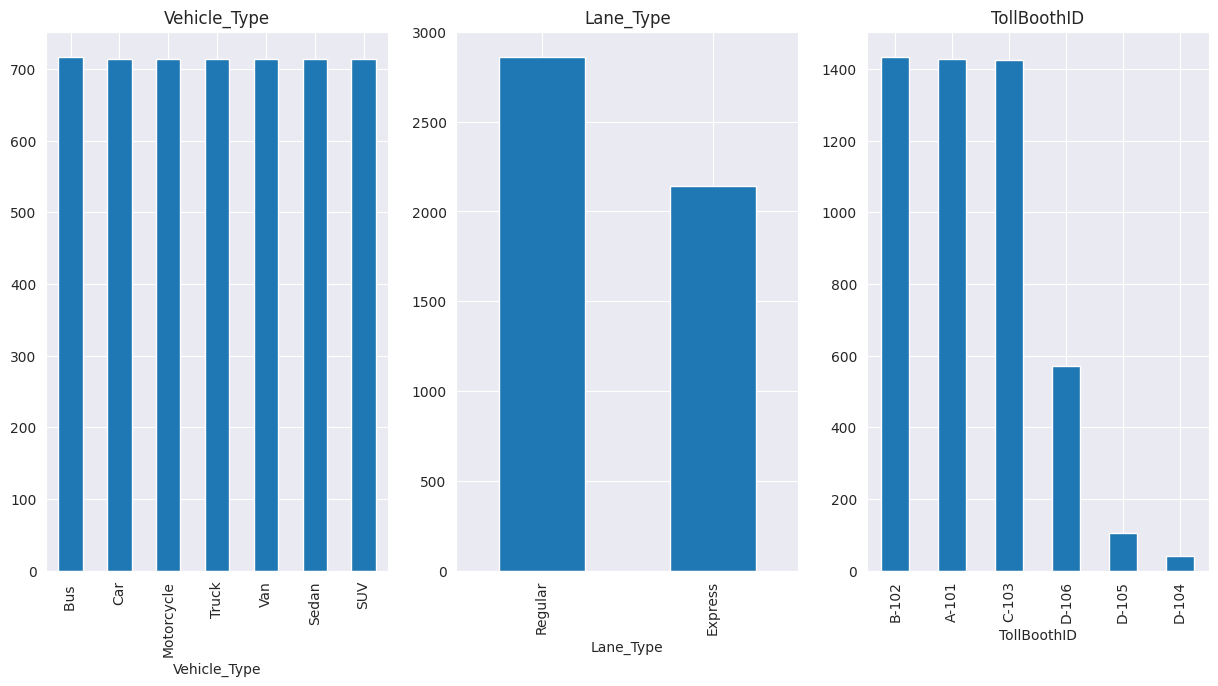

In [20]:
# Bar plots for categorical features
categorical_features = ['Vehicle_Type', 'Lane_Type', 'TollBoothID']
plt.figure(figsize=(15, 7))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
plt.show()

/tmp/ipykernel_10184/2535894053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud_indicator', data=df, palette=['red', 'green'])


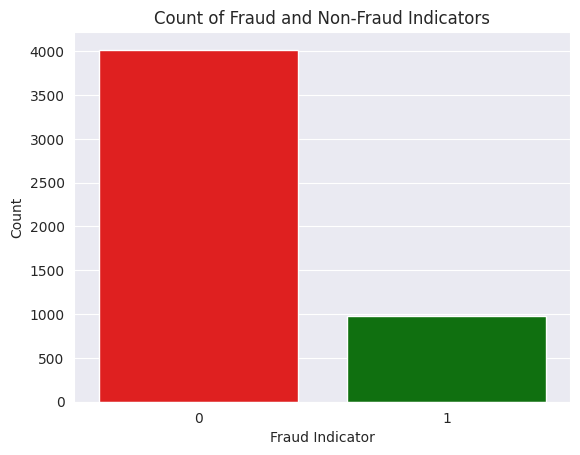

In [21]:
#Count of Fraud and Non_Fraud Indicators bold text
sns.countplot(x='Fraud_indicator', data=df, palette=['red', 'green'])
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.title('Count of Fraud and Non-Fraud Indicators')
plt.show()

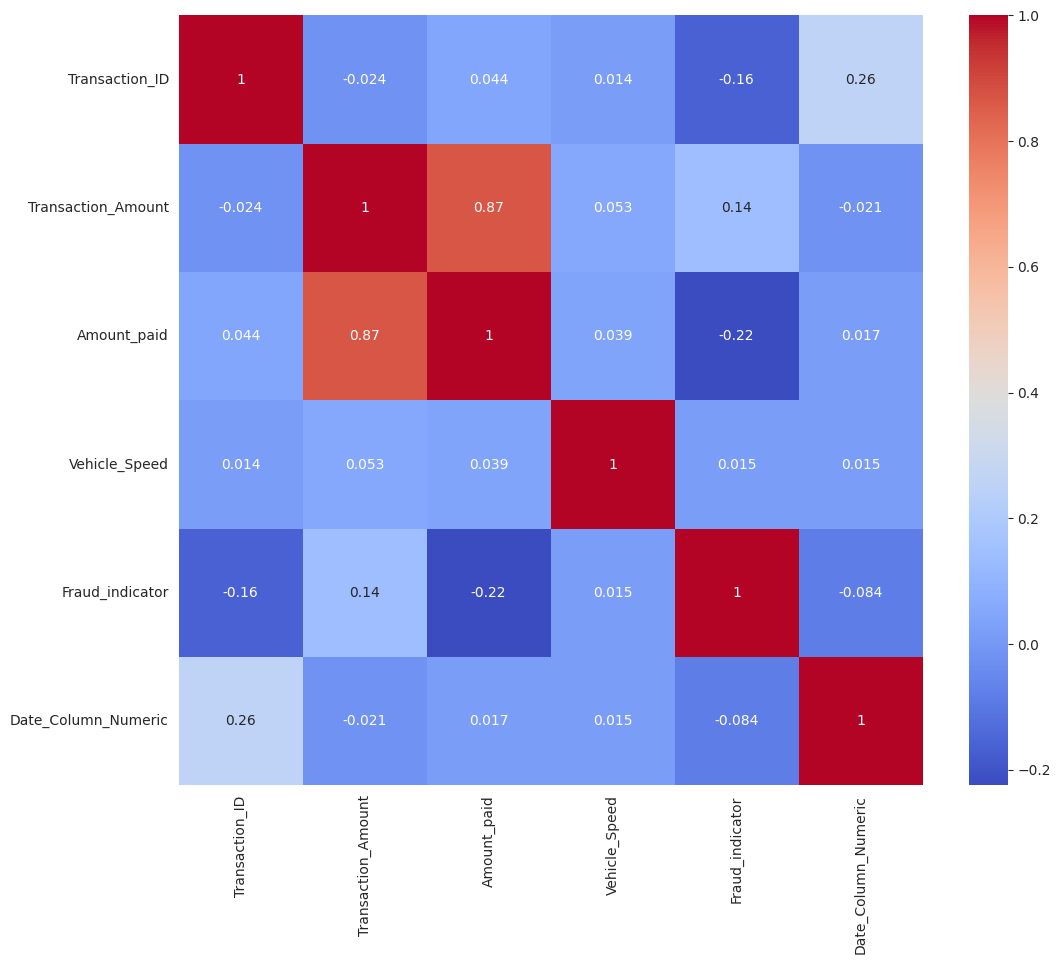

In [22]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_10184/1729941162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


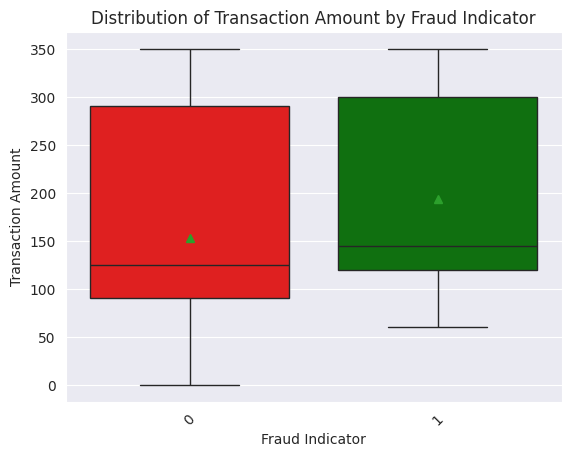

In [23]:
# Distribution of Transaction Amount by Fraud Indicator
sns.boxplot(
    x = "Fraud_indicator",
    y = "Transaction_Amount",
    showmeans=True,
    data=df,
    palette=["red", "green"]
)

plt.xlabel("Fraud Indicator")
plt.ylabel("Transaction Amount")
plt.title("Distribution of Transaction Amount by Fraud Indicator")
plt.xticks(rotation=45)
plt.show()


Unique values in categorical columns:
Vehicle_Type: ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
FastagID: ['FTG-001-ABC-121' 'FTG-002-XYZ-451' nan ... 'FTG-447-PLN-109'
 'FTG-458-VFR-876' 'FTG-459-WSX-543']
TollBoothID: ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Lane_Type: ['Express' 'Regular']
Vehicle_Dimensions: ['Large' 'Small' 'Medium']
Geographical_Location: ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']
Vehicle_Plate_Number: ['KA11AB1234' 'KA66CD5678' 'KA88EF9012' ... 'KA33WX6789' 'KA35YZ0123'
 'KA37AB3456']


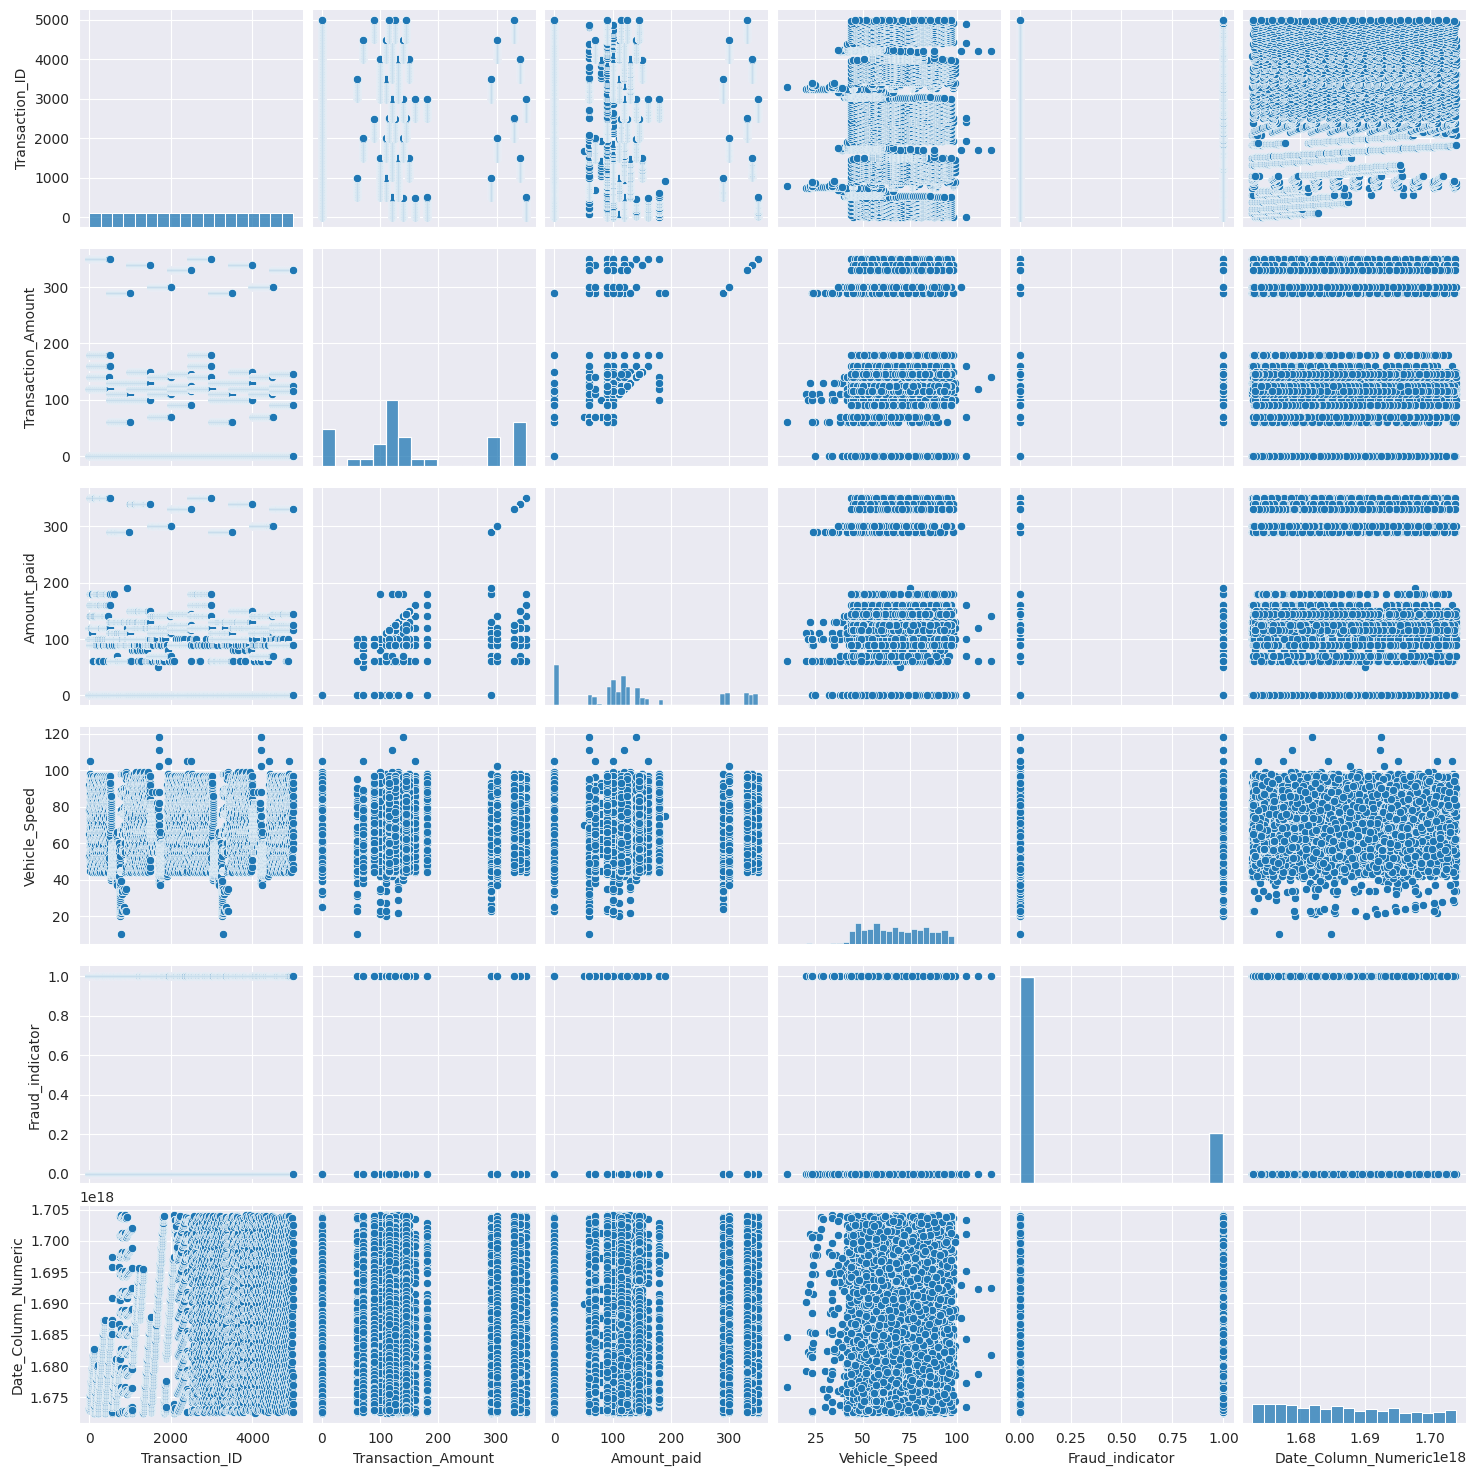

In [24]:
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")
sns.pairplot(df)
plt.show()

# 2.FEATURE ENGINEERING

In [25]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [26]:
# Extract additional features from Timestamp
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

In [27]:
# Encode categorical features
# Use separate encoder instances for each feature
encoder_vehicle = OneHotEncoder(sparse=False)
encoded_vehicle_type = encoder_vehicle.fit_transform(df[['Vehicle_Type']])

encoder_lane = OneHotEncoder(sparse=False)
encoded_lane_type = encoder_lane.fit_transform(df[['Lane_Type']])

encoder_tollbooth = OneHotEncoder(sparse=False)
encoded_tollbooth_id = encoder_tollbooth.fit_transform(df[['TollBoothID']])


/home/hgidea/Desktop/Coding/Python/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/hgidea/Desktop/Coding/Python/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/hgidea/Desktop/Coding/Python/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
# Convert to DataFrame and concatenate with the main dataframe
encoded_vehicle_type_df = pd.DataFrame(encoded_vehicle_type, columns=encoder_vehicle.get_feature_names_out(['Vehicle_Type']))
encoded_lane_type_df = pd.DataFrame(encoded_lane_type, columns=encoder_lane.get_feature_names_out(['Lane_Type']))
encoded_tollbooth_id_df = pd.DataFrame(encoded_tollbooth_id, columns=encoder_tollbooth.get_feature_names_out(['TollBoothID']))


In [29]:
df = pd.concat([df, encoded_vehicle_type_df, encoded_lane_type_df, encoded_tollbooth_id_df], axis=1)


In [30]:
# Drop original categorical columns
df.drop(['Vehicle_Type', 'Lane_Type', 'TollBoothID', 'Timestamp'], axis=1, inplace=True)


In [31]:
# Additional feature engineering
df['Transaction_Discrepancy'] = df['Transaction_Amount'] - df['Amount_paid']


In [32]:
# Drop Vehicle_Dimensions column
df.drop('Vehicle_Dimensions', axis=1, inplace=True)


In [33]:
# Drop irrelevant columns
df.drop(['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Geographical_Location'], axis=1, inplace=True)


In [34]:
# Check final dataset columns
print(df.columns)

Index(['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Fraud_indicator',
       'Date_Column_Numeric', 'Hour', 'DayOfWeek', 'Month',
       'Vehicle_Type_Bus ', 'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle',
       'Vehicle_Type_SUV', 'Vehicle_Type_Sedan', 'Vehicle_Type_Truck',
       'Vehicle_Type_Van', 'Lane_Type_Express', 'Lane_Type_Regular',
       'TollBoothID_A-101', 'TollBoothID_B-102', 'TollBoothID_C-103',
       'TollBoothID_D-104', 'TollBoothID_D-105', 'TollBoothID_D-106',
       'Transaction_Discrepancy'],
      dtype='object')


In [35]:
df.head()

,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Date_Column_Numeric,Hour,DayOfWeek,Month,Vehicle_Type_Bus,Vehicle_Type_Car,...,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular,TollBoothID_A-101,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Transaction_Discrepancy
0,350,120,65,1,1673004000000000000,11,4,1,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,230
1,120,100,78,1,1673103300000000000,14,5,1,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20
2,0,0,53,0,1673202300000000000,18,6,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,350,120,92,1,1673229900000000000,2,0,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,230
4,140,100,60,1,1673332500000000000,6,1,1,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40


In [36]:
df.shape

(5000, 24)

In [37]:
num_col = df.select_dtypes(include = ['int','float','uint']).columns
num_col


Index(['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Fraud_indicator',
       'Date_Column_Numeric', 'Hour', 'DayOfWeek', 'Month',
       'Vehicle_Type_Bus ', 'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle',
       'Vehicle_Type_SUV', 'Vehicle_Type_Sedan', 'Vehicle_Type_Truck',
       'Vehicle_Type_Van', 'Lane_Type_Express', 'Lane_Type_Regular',
       'TollBoothID_A-101', 'TollBoothID_B-102', 'TollBoothID_C-103',
       'TollBoothID_D-104', 'TollBoothID_D-105', 'TollBoothID_D-106',
       'Transaction_Discrepancy'],
      dtype='object')

In [38]:
cat_col = df.select_dtypes(include = ['object']).columns
cat_col

Index([], dtype='object')

In [39]:
df.nunique()

Transaction_Amount           20
Amount_paid                  23
Vehicle_Speed                85
Fraud_indicator               2
Date_Column_Numeric        4423
Hour                         24
DayOfWeek                     7
Month                        12
Vehicle_Type_Bus              2
Vehicle_Type_Car              2
Vehicle_Type_Motorcycle       2
Vehicle_Type_SUV              2
Vehicle_Type_Sedan            2
Vehicle_Type_Truck            2
Vehicle_Type_Van              2
Lane_Type_Express             2
Lane_Type_Regular             2
TollBoothID_A-101             2
TollBoothID_B-102             2
TollBoothID_C-103             2
TollBoothID_D-104             2
TollBoothID_D-105             2
TollBoothID_D-106             2
Transaction_Discrepancy      45
dtype: int64

In [40]:
df[num_col].nunique()

Transaction_Amount           20
Amount_paid                  23
Vehicle_Speed                85
Fraud_indicator               2
Date_Column_Numeric        4423
Hour                         24
DayOfWeek                     7
Month                        12
Vehicle_Type_Bus              2
Vehicle_Type_Car              2
Vehicle_Type_Motorcycle       2
Vehicle_Type_SUV              2
Vehicle_Type_Sedan            2
Vehicle_Type_Truck            2
Vehicle_Type_Van              2
Lane_Type_Express             2
Lane_Type_Regular             2
TollBoothID_A-101             2
TollBoothID_B-102             2
TollBoothID_C-103             2
TollBoothID_D-104             2
TollBoothID_D-105             2
TollBoothID_D-106             2
Transaction_Discrepancy      45
dtype: int64

# 3. Model Development

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [42]:
# Split the dataset into training and testing sets
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [44]:
# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(class_weight='balanced', random_state=42)
}


In [46]:
# Hyperparameters to tune
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}


In [47]:
# Perform GridSearchCV for each model
best_estimators = {}
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 score: {grid_search.best_score_}")
    print("\n")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best F1 score: 0.982997288839141


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 score: 0.9970802530802529


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best F1 score: 0.9992727272727272


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Support Vector Machine: {'C': 1, 'kernel': 'linear'}
Best F1 score: 0.9844458982313835




In [48]:

# Evaluate each best model
for model_name, best_model in best_estimators.items():
    print(f"Evaluating {model_name}")
    y_pred = best_model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


Evaluating Logistic Regression
Accuracy: 0.986
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1205
           1       1.00      0.93      0.96       295

    accuracy                           0.99      1500
   macro avg       0.99      0.96      0.98      1500
weighted avg       0.99      0.99      0.99      1500

Confusion Matrix:
[[1205    0]
 [  21  274]]

Evaluating Random Forest
Accuracy: 0.998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1205
           1       1.00      0.99      0.99       295

    accuracy                           1.00      1500
   macro avg       1.00      0.99      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Confusion Matrix:
[[1205    0]
 [   3  292]]

Evaluating Gradient Boosting
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support


'''Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
'''


In [49]:
df.isnull().sum()

Transaction_Amount         0
Amount_paid                0
Vehicle_Speed              0
Fraud_indicator            0
Date_Column_Numeric        0
Hour                       0
DayOfWeek                  0
Month                      0
Vehicle_Type_Bus           0
Vehicle_Type_Car           0
Vehicle_Type_Motorcycle    0
Vehicle_Type_SUV           0
Vehicle_Type_Sedan         0
Vehicle_Type_Truck         0
Vehicle_Type_Van           0
Lane_Type_Express          0
Lane_Type_Regular          0
TollBoothID_A-101          0
TollBoothID_B-102          0
TollBoothID_C-103          0
TollBoothID_D-104          0
TollBoothID_D-105          0
TollBoothID_D-106          0
Transaction_Discrepancy    0
dtype: int64

In [50]:
import time
model.fit(X_train, y_train)
# Measure prediction latency
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time
print(f"Prediction time for {len(X_test)} samples: {prediction_time:.2f} seconds")
print(f"Average prediction time per sample: {prediction_time/len(X_test):.6f} seconds")


Prediction time for 1500 samples: 0.08 seconds
Average prediction time per sample: 0.000052 seconds


**Build an ML Pipeline**

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('classifier', GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42))
])


In [53]:

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            random_state=42))])

In [54]:
# Evaluate the pipeline
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1205
           1       1.00      1.00      1.00       295

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Confusion Matrix:
[[1205    0]
 [   0  295]]


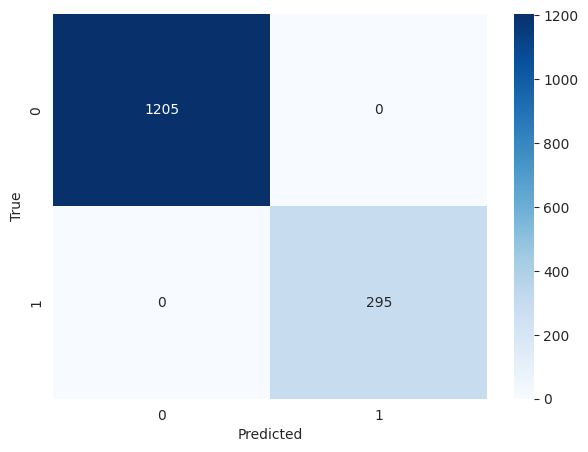

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test set results
y_pred = pipeline.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
# Save the pipeline
import joblib
joblib.dump(pipeline, '/home/hgidea/Desktop/Coding/Python/internship/mentorness/ml_2/fastag_fraud_detection_pipeline.pkl')


['/home/hgidea/Desktop/Coding/Python/internship/mentorness/ml_2/fastag_fraud_detection_pipeline.pkl']

# 5. Explanatory Analysis

In [59]:
# Explanatory Analysis with SHAP
import shap

# Create a SHAP explainer
explainer = shap.Explainer(pipeline.named_steps['classifier'], X_train)




In [60]:
# Calculate SHAP values
shap_values = explainer(X_test)


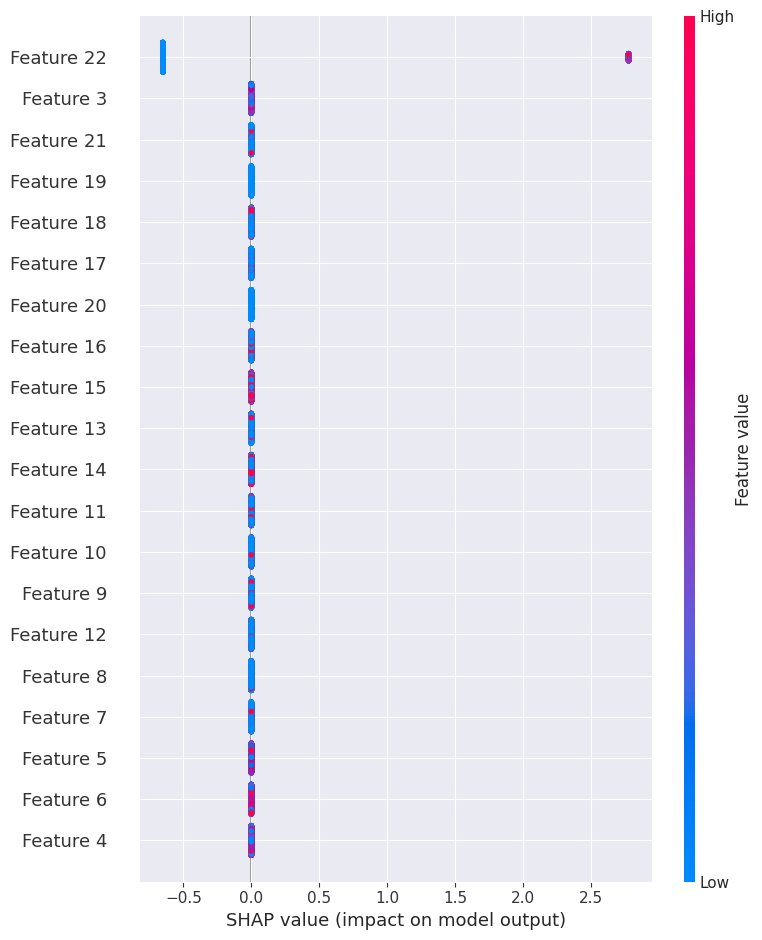

In [61]:

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)


In [62]:

# Detailed explanation for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [63]:
# Assuming 'X_train' is your training data
print(X_train.shape)  # This should output (num_samples, 23)


(3500, 23)


NameError: name 'input_df' is not defined